# Analisi Risultati

## Confronto algoritmi al variare del numero di nodi

In [1]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np
import math

results_path = './results/session9/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp','V','E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,graph1,parallelbcsrtc,0.112640,0.893216,1.005856,20241011143454,4,5
1,BVZ-tsukuba4,parallelbcsrvc,3.603584,3496.790283,3500.393799,20241011155227,110594,496135
2,BVZ-tsukuba11,parallelbcsrvc,5.491552,4041.761963,4047.253418,20241011155511,110594,510446
3,BVZ-tsukuba11,parallelbcsrvc,5.528000,5000.697754,5006.225586,20241011155842,110594,510446
4,graph9b,parallelbcsrtc,3.640896,562497.312500,562500.937500,20241011142122,100000,2304964
...,...,...,...,...,...,...,...,...
635,BVZ-tsukuba12,parallelbcsrvc,6.117728,4014.004639,4020.122314,20241011155734,110594,510816
636,BVZ-tsukuba12,parallelbcsrvc,6.004544,3693.439209,3699.443848,20241011154826,110594,510816
637,graph5b,parallelbcsrtc,0.585728,74.031906,74.617630,20241011143645,10000,184714
638,BVZ-tsukuba6,parallelbcsrvc,5.356224,1848.437622,1853.793945,20241011155233,110594,512938


In [2]:
# Aggregazione dei risultati (media, deviazione standard, minimo e massimo dei tempi)
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,BVZ-tsukuba0,parallelbcsrvc,110594,514483,5.189491,0.728306,3.793920,6.009344,3468.701758,59.590367,3335.999268,3525.404297,3473.891260,59.376461,3342.008545,3530.719482
1,BVZ-tsukuba1,parallelbcsrvc,110594,526213,5.105110,0.986039,3.656800,6.364832,2887.087134,422.637012,2316.001221,3547.411133,2892.192261,422.595945,2322.056641,3553.007812
2,BVZ-tsukuba10,parallelbcsrvc,110594,516529,5.230931,0.788461,3.736096,5.975968,3099.053198,337.162204,2797.337158,3663.989258,3104.284106,336.912138,2803.105713,3667.725342
3,BVZ-tsukuba11,parallelbcsrvc,110594,510446,5.415738,0.593080,3.836448,6.063552,4101.839917,400.117163,3778.154541,5000.697754,4107.255664,400.263341,3783.596436,5006.225586
4,BVZ-tsukuba12,parallelbcsrvc,110594,510816,5.410432,0.883241,3.780480,6.117728,3863.831616,107.703796,3693.439209,4014.004639,3869.242017,107.674973,3699.443848,4020.122314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,graph8,parallelbcsrvc,50000,541232,2.847984,0.463106,2.158784,3.210176,385.443701,6.354168,370.110016,390.634338,388.291675,6.373670,373.230011,393.723358
60,graph8b,parallelbcsrtc,50000,1082464,2.957693,0.561275,2.013056,3.700032,133779.253125,188.843247,133478.921875,134068.546875,133782.209375,189.123989,133480.953125,134071.546875
61,graph8b,parallelbcsrvc,50000,1082464,2.716627,0.643349,2.113504,3.817440,33.148468,6.213094,27.421057,48.448769,35.865095,6.600987,29.575136,51.651455
62,graph9b,parallelbcsrtc,100000,2304964,3.871050,0.635446,3.620224,5.675008,562567.268750,675.834327,561719.500000,564139.687500,562571.150000,676.359943,561723.125000,564145.375000


In [3]:
# Ordinamento dei risultati in base al numero di nodi
agg_results = agg_results.sort_values(by=['V'])
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
19,graph1,serial,4,5,0.004600,0.002716,0.002000,0.011000,0.006800,0.010347,0.002000,0.036000,0.011900,0.013051,0.004000,0.048000
18,graph1,parallelbcsrvc,4,5,0.160650,0.093768,0.118784,0.419040,1.805274,0.422932,1.334208,2.631744,1.965923,0.494346,1.455968,3.050784
17,graph1,parallelbcsrtc,4,5,0.124499,0.017804,0.108544,0.161472,1.131661,0.308622,0.893216,1.659296,1.256160,0.316702,1.005856,1.783104
16,graph1,parallel,4,5,0.201482,0.232549,0.107200,0.862112,0.342390,0.164836,0.206464,0.801632,0.543872,0.396150,0.313664,1.663744
22,graph2,parallelbcsrvc,6,8,0.145811,0.013852,0.118528,0.158976,1.520707,0.266578,1.110752,1.877120,1.666518,0.272139,1.229280,2.017408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,BVZ-tsukuba6,parallelbcsrvc,110594,512938,5.628515,0.345356,5.356224,6.301984,2332.860376,441.242975,1848.437622,2913.047607,2338.488879,441.345228,1853.793945,2918.474365
13,BVZ-tsukuba7,parallelbcsrvc,110594,502599,5.467210,0.200927,5.276416,5.993376,3958.781494,86.556944,3851.736816,4084.363037,3964.248730,86.463894,3857.333496,4089.748047
14,BVZ-tsukuba8,parallelbcsrvc,110594,503938,4.753834,0.902143,3.644320,5.955936,3540.095557,98.588437,3379.236816,3685.971680,3544.849414,99.045855,3383.123535,3691.464844
8,BVZ-tsukuba2,parallelbcsrvc,110594,508272,4.788064,0.815210,3.767744,5.505312,3636.459741,80.659346,3472.199707,3729.107666,3641.247827,80.889180,3476.096191,3734.513916


### Confronto tempi di esecuzione
Asse X -> numero di nodi del grafo (in scala logaritmica)

Asse Y -> tempo di esecuzione dell'algoritmo in ms (in scala logaritmica)

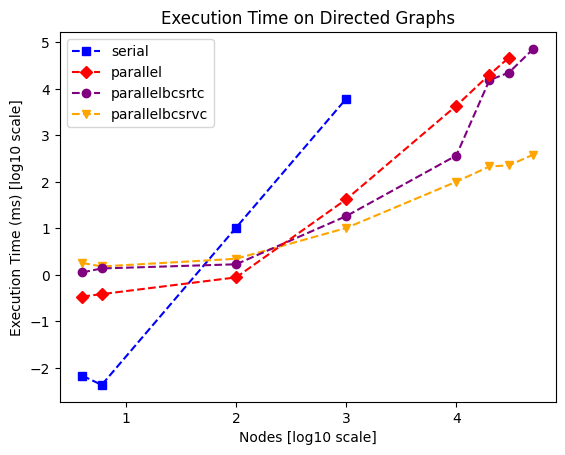

In [4]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsrtc': {'linestyle': 'dashed', 'color': 'purple', 'marker': 'o'},
              'parallelbcsrvc': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

legend_order = ['serial', 'parallel', 'parallelbcsrtc', 'parallelbcsrvc']

# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and not contains 'tsukuba'
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]

# Line plot
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
#plt.xticks(rotation=45)
plt.show()

### Confronto grafi diretti vs indiretti

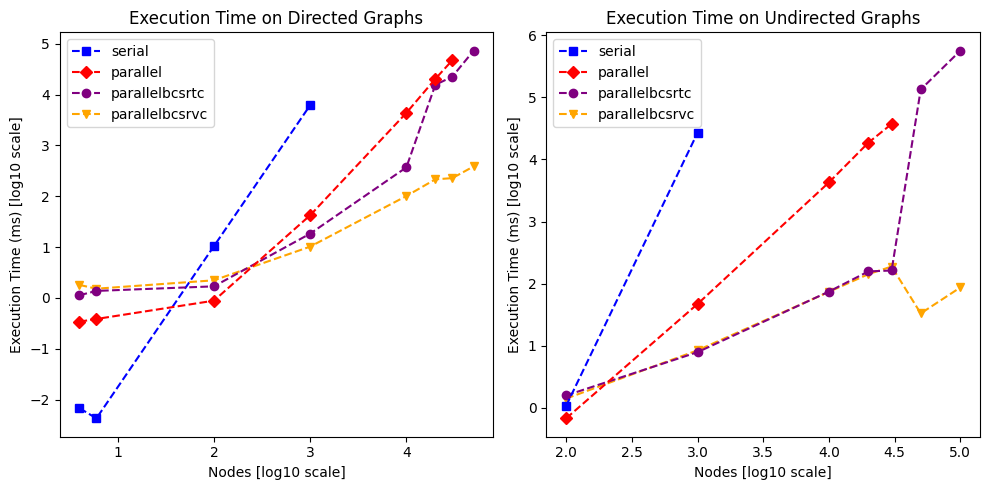

In [5]:
# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and plot execution time for each algorithm on undirected graphs (graphId ends with 'b') 
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]
agg_results_undirected = agg_results[agg_results['graphId'].str.endswith('b')]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
#plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
for algorithm in agg_results_undirected['algorithm'].unique():
    data = agg_results_undirected[agg_results_undirected['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Undirected Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Confronto tempi di esecuzione tra grafi diretti e indiretti (per ogni algoritmo)

**Asse X -> nome del grafo**

Asse Y -> tempo di esecuzione dell'algoritmo in ms (in scala logaritmica)

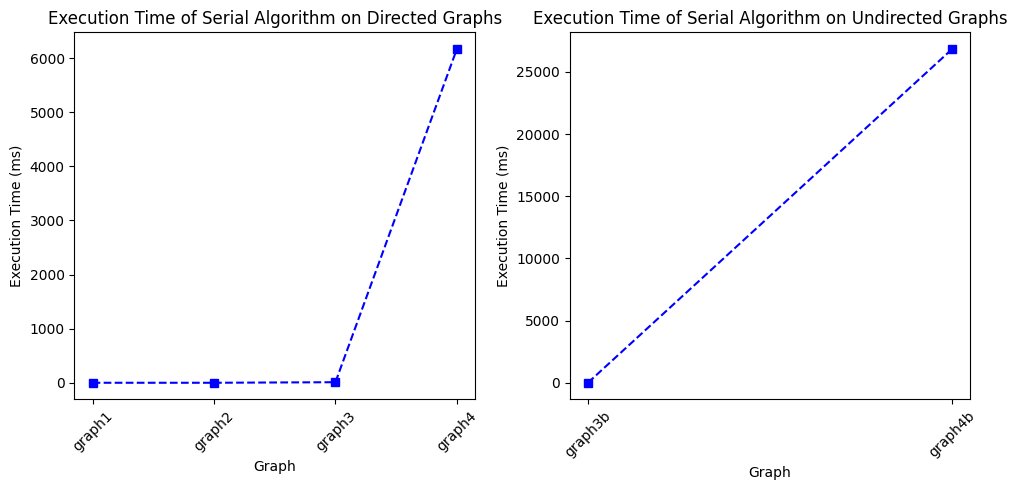

In [6]:
# Plot execution time of serial algorithm for directed and undirected graphs separately (BY GRAPH NAME)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'serial') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'serial') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Serial Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Serial Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

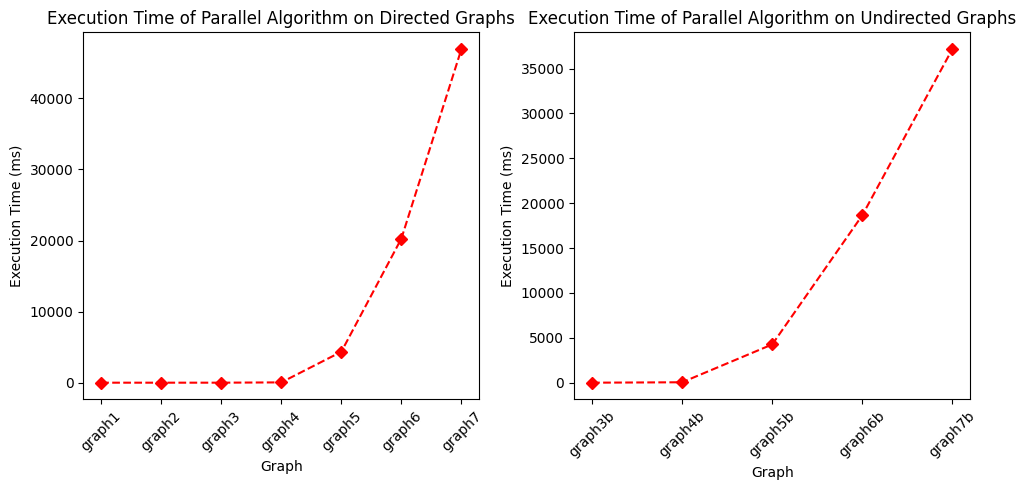

In [7]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately (BY GRAPH NAME)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallel') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallel') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

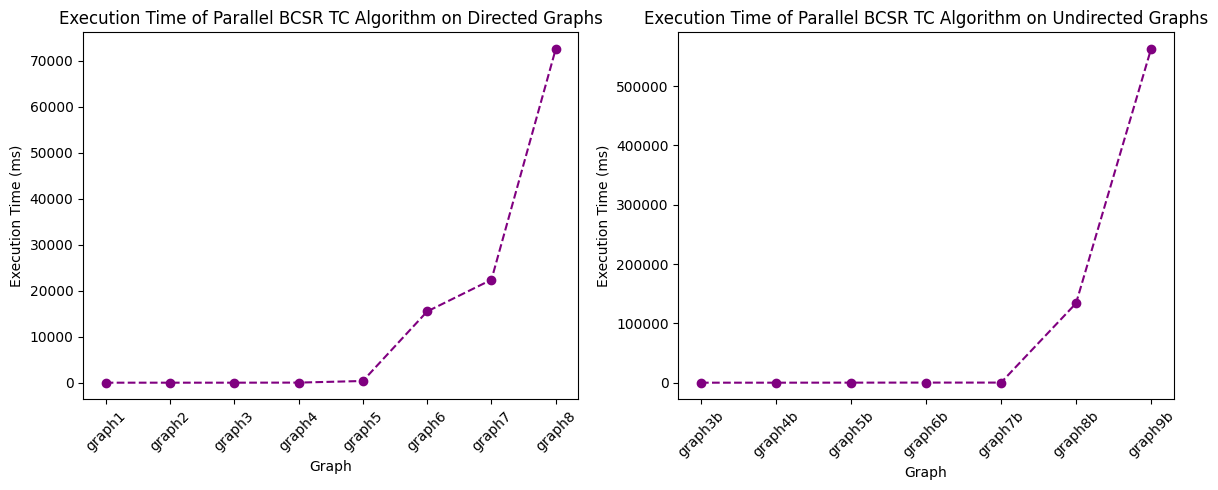

In [8]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately (BY GRAPH NAME)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsrtc') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsrtc') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallelbcsrtc', linestyle=plot_style['parallelbcsrtc']['linestyle'], color=plot_style['parallelbcsrtc']['color'], marker=plot_style['parallelbcsrtc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR TC Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallelbcsrtc', linestyle=plot_style['parallelbcsrtc']['linestyle'], color=plot_style['parallelbcsrtc']['color'], marker=plot_style['parallelbcsrtc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR TC Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import re

# Funzione per estrarre il numero da una stringa
def extract_number(graphId):
    match = re.search(r'(\d+)$', graphId)
    return int(match.group(0)) if match else -1  # Ritorna -1 se non trova un numero

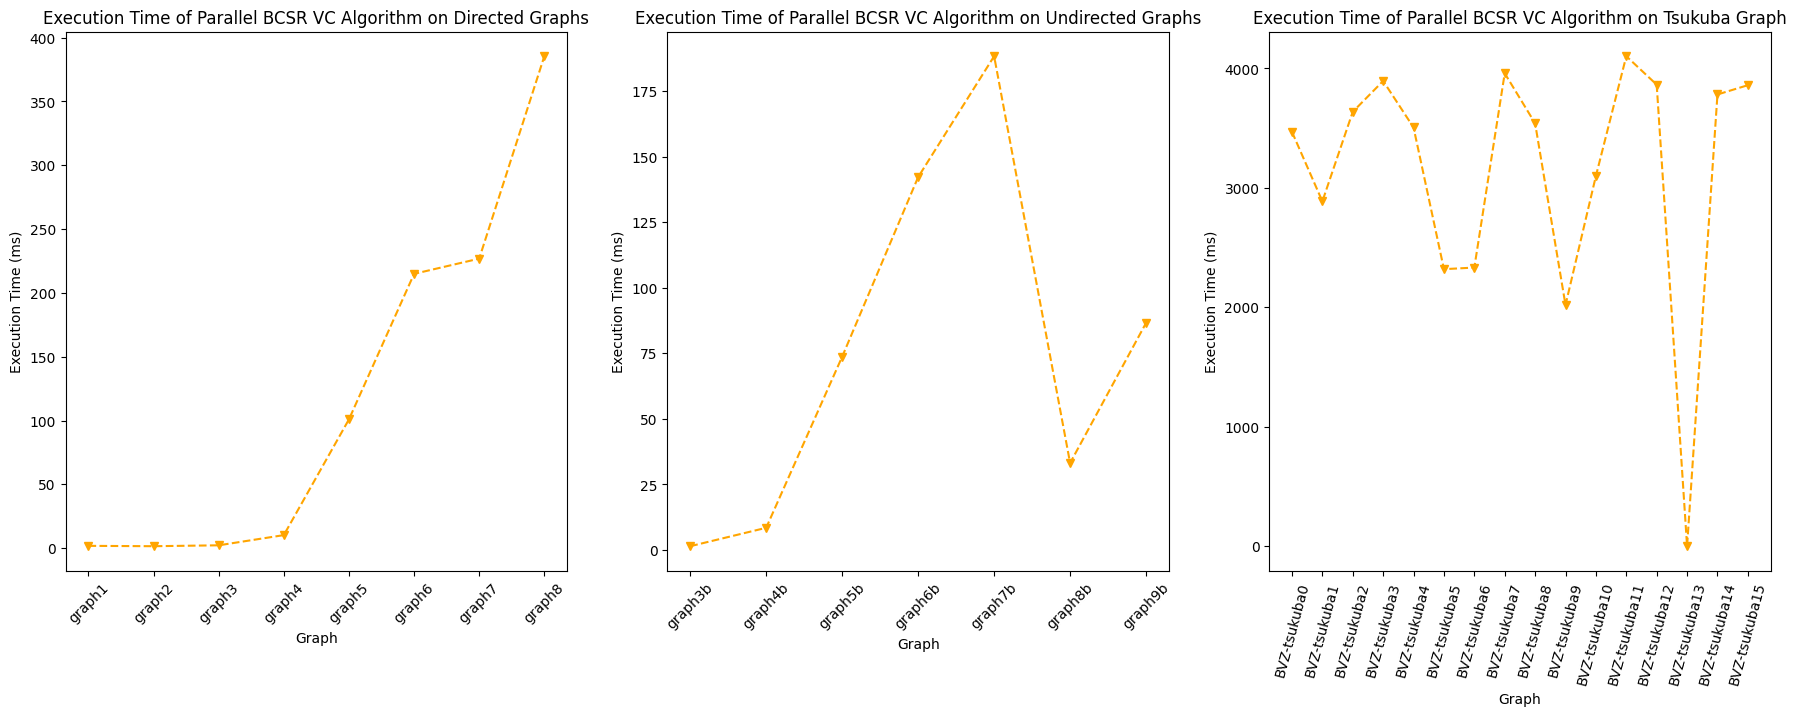

In [10]:
# Plot execution time of parallelbcsrvc algorithm for directed and undirected graphs separately (BY GRAPH NAME)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (~agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_directed_tsukuba = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (agg_results['graphId'].str.contains('tsukuba'))].sort_values(by=['graphId'], key=lambda x: x.apply(extract_number))
plt.figure(figsize=(22, 7))
plt.subplot(1, 3, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR VC Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR VC Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
plt.plot(agg_results_directed_tsukuba['graphId'], agg_results_directed_tsukuba['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR VC Algorithm on Tsukuba Graph')
plt.xticks(rotation=75)
plt.show()

### Confronto tempi di esecuzione tra grafi diretti e indiretti (per ogni algoritmo)

**Asse X -> numero di nodi del grafo (in scala logaritmica)**

Asse Y -> tempo di esecuzione dell'algoritmo in ms (in scala logaritmica)

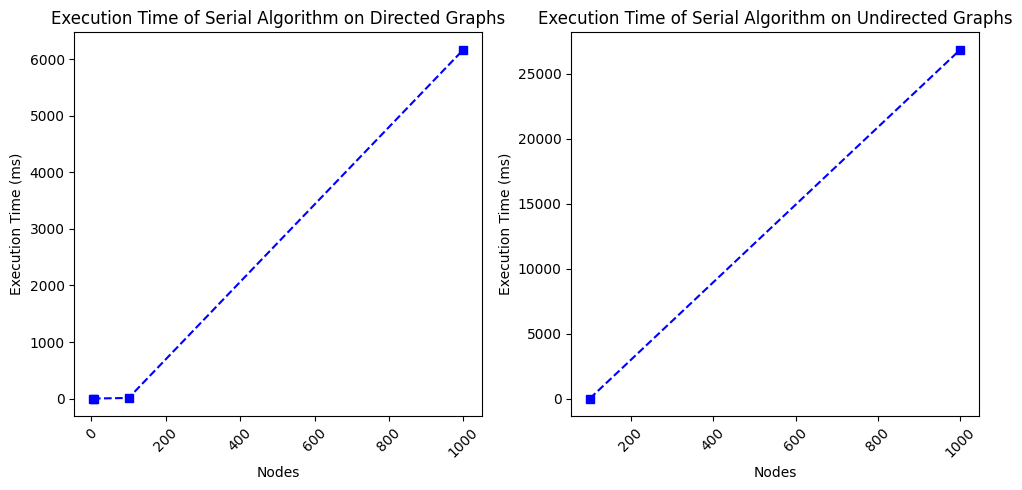

In [11]:
# Plot execution time of serial algorithm for directed and undirected graphs separately (BY GRAPH SIZE)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'serial') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'serial') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['V'], agg_results_directed['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Nodes')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Serial Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['V'], agg_results_undirected['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Nodes')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Serial Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

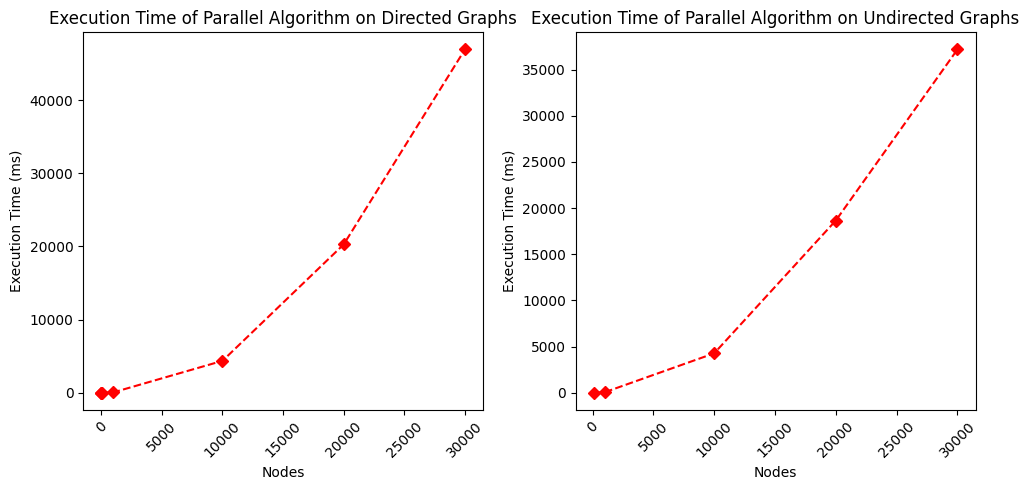

In [12]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately (BY GRAPH SIZE)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallel') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallel') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['V'], agg_results_directed['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Nodes')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['V'], agg_results_undirected['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Nodes')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

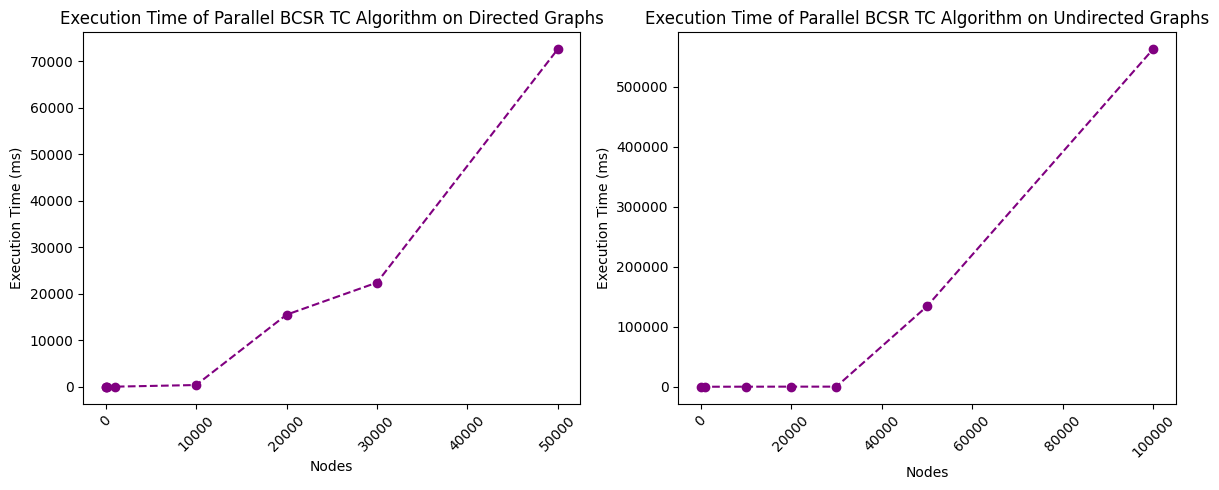

In [13]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately (BY GRAPH SIZE)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsrtc') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsrtc') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['V'], agg_results_directed['execTime_mean'], label='parallelbcsrtc', linestyle=plot_style['parallelbcsrtc']['linestyle'], color=plot_style['parallelbcsrtc']['color'], marker=plot_style['parallelbcsrtc']['marker'])
plt.xlabel('Nodes')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR TC Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['V'], agg_results_undirected['execTime_mean'], label='parallelbcsrtc', linestyle=plot_style['parallelbcsrtc']['linestyle'], color=plot_style['parallelbcsrtc']['color'], marker=plot_style['parallelbcsrtc']['marker'])
plt.xlabel('Nodes')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR TC Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

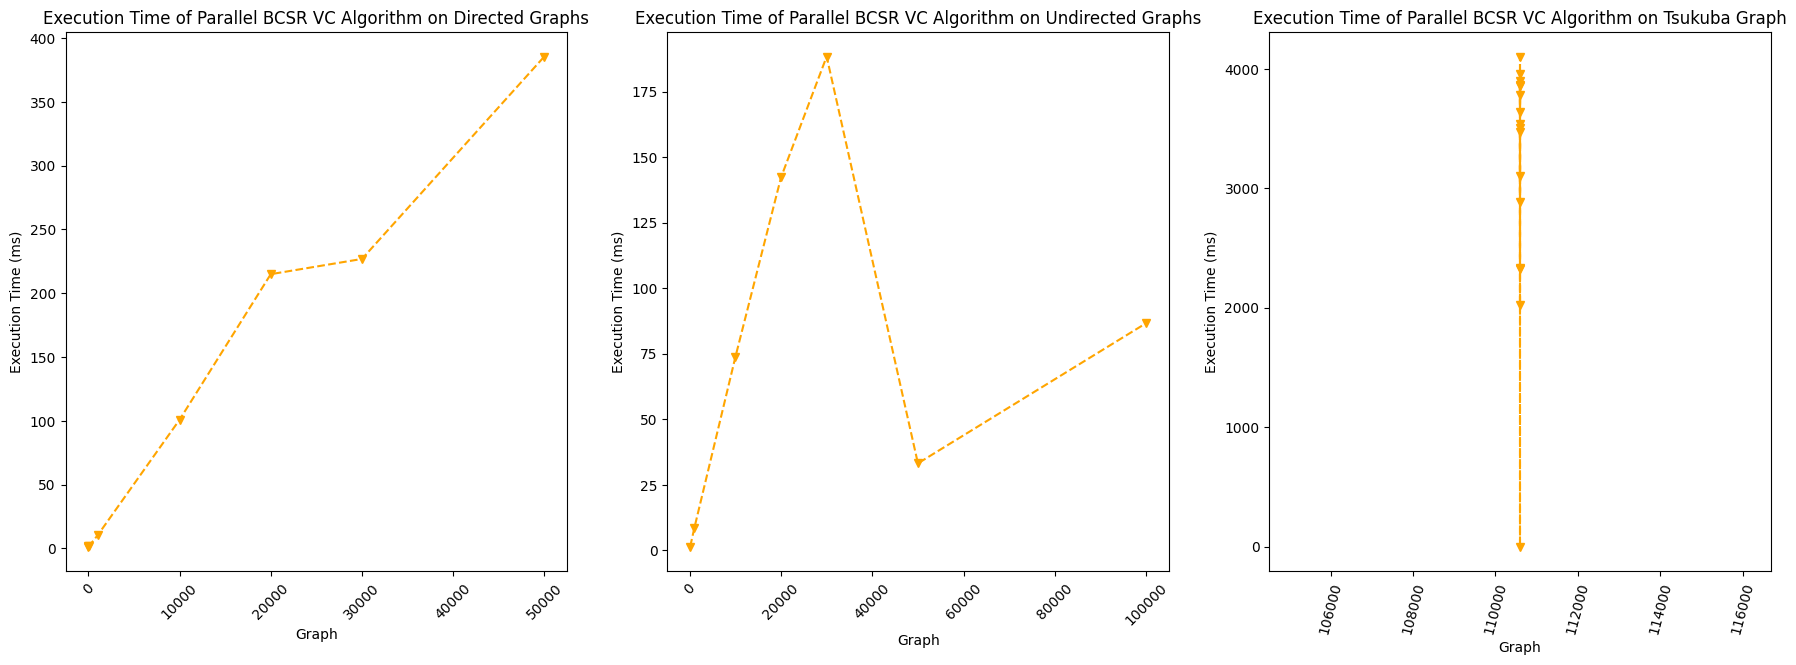

In [14]:
# Plot execution time of parallelbcsrvc algorithm for directed and undirected graphs separately (BY GRAPH SIZE)
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (~agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_directed_tsukuba = agg_results[(agg_results['algorithm'] == 'parallelbcsrvc') & (agg_results['graphId'].str.contains('tsukuba'))].sort_values(by=['graphId'], key=lambda x: x.apply(extract_number))
plt.figure(figsize=(22, 7))
plt.subplot(1, 3, 1)
plt.plot(agg_results_directed['V'], agg_results_directed['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR VC Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
plt.plot(agg_results_undirected['V'], agg_results_undirected['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR VC Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
plt.plot(agg_results_directed_tsukuba['V'], agg_results_directed_tsukuba['execTime_mean'], label='parallelbcsrvc', linestyle=plot_style['parallelbcsrvc']['linestyle'], color=plot_style['parallelbcsrvc']['color'], marker=plot_style['parallelbcsrvc']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time of Parallel BCSR VC Algorithm on Tsukuba Graph')
plt.xticks(rotation=75)
plt.show()

## Confronto algoritmi al variare della densità del grafo

In [15]:
results_path = './results/session10_density1K/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp', 'V', 'E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,graphP08,parallelbcsrvc,1.644544,73.764099,75.408638,20241011170909,1000,798960
1,graphP09,parallelbcsrvc,1.768640,71.157791,72.926430,20241011170915,1000,898956
2,graphP05,parallel,12.489952,79.338692,91.828644,20241011165803,1000,499792
3,graphP08,parallelbcsrtc,1.650208,185.409698,187.059906,20241011170454,1000,798960
4,graphP08,parallel,9.566496,76.801987,86.368477,20241011165832,1000,798960
...,...,...,...,...,...,...,...,...
295,graphP04,parallel,11.572000,77.603165,89.175171,20241011165821,1000,399515
296,graphP09,parallel,8.073856,75.398430,83.472290,20241011165810,1000,898956
297,graphP08,parallelbcsrtc,1.625888,169.828583,171.454468,20241011170251,1000,798960
298,graphP09,parallelbcsrtc,2.168832,176.851425,179.020248,20241011170125,1000,898956


In [16]:
# Aggregazione dei risultati (media, deviazione standard, minimo e massimo dei tempi)
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,graphP01,parallel,1000,99554,7.953539,0.957107,7.252192,9.949888,62.311644,0.330101,61.841759,63.091839,70.265184,1.220011,69.243103,72.618752
1,graphP01,parallelbcsrtc,1000,99554,0.816493,0.154227,0.563040,1.038720,27.069942,3.263747,25.210079,35.656258,27.886436,3.343057,25.773121,36.598946
2,graphP01,parallelbcsrvc,1000,99554,0.764483,0.118914,0.571392,0.875296,19.216992,0.372315,18.584896,19.728544,19.981475,0.476464,19.156288,20.559296
3,graphP02,parallel,1000,199816,8.853968,0.207666,8.658048,9.301312,70.127130,0.247099,69.933983,70.753372,78.981097,0.321726,78.667137,79.507423
4,graphP02,parallelbcsrtc,1000,199816,1.084320,0.226496,0.821120,1.424160,52.550860,6.390846,49.327679,69.641533,53.635181,6.437050,50.148800,70.895584
5,graphP02,parallelbcsrvc,1000,199816,1.075258,0.127924,0.829760,1.164288,39.266128,0.484514,38.246910,39.751999,40.341385,0.604130,39.085217,40.878338
6,graphP03,parallel,1000,300122,10.457981,0.877283,10.029504,12.903904,74.912522,0.469220,74.633949,76.197571,85.370503,1.338623,84.731972,89.101471
7,graphP03,parallelbcsrtc,1000,300122,1.463478,0.304000,1.028064,1.787040,96.231011,0.528742,95.430206,96.755905,97.694490,0.823565,96.485954,98.542946
8,graphP03,parallelbcsrvc,1000,300122,1.448179,0.293241,1.032192,1.798432,54.321235,0.659268,52.996544,54.875648,55.769415,0.888233,54.037025,56.560287
9,graphP04,parallel,1000,399515,11.720531,0.290618,11.237888,12.187552,77.687479,0.232056,77.407486,78.208031,89.408010,0.456406,88.845314,90.060928


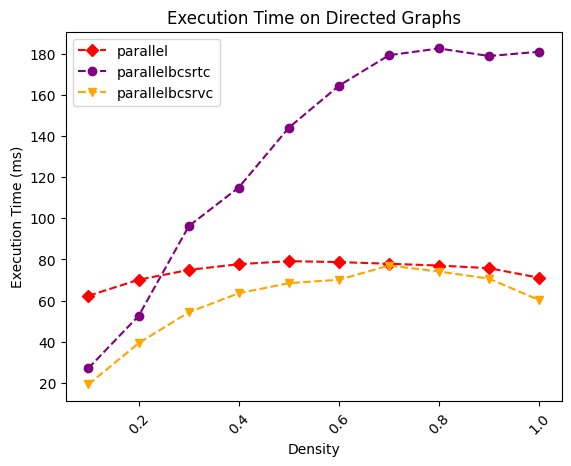

In [17]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsrtc': {'linestyle': 'dashed', 'color': 'purple', 'marker': 'o'},
              'parallelbcsrvc': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

legend_order = ['parallel', 'parallelbcsrtc', 'parallelbcsrvc']

# Line plot
for algorithm in agg_results['algorithm'].unique():
    data = agg_results[agg_results['algorithm'] == algorithm]
    density = data['E'] / (data['V'] * (data['V'] -1))
    plt.plot(density, data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Density')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time on Directed Graphs')
#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[labels.index(algo)] for algo in legend_order], legend_order)
plt.xticks(rotation=45)
plt.show()